Left turn walking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

acc = pd.read_csv('data/left_turn_indoors/Accelerometer.csv', delimiter=';', decimal='.')
gyr = pd.read_csv('data/left_turn_indoors/Gyroscope.csv', delimiter=';', decimal='.')
mag = pd.read_csv('data/left_turn_indoors/Magnetometer.csv', delimiter=';', decimal='.')

acc_fs = 100 / (acc['Time (s)'].iloc[99] - acc['Time (s)'].iloc[0])
gyr_fs = 100 / (gyr['Time (s)'].iloc[99] - gyr['Time (s)'].iloc[0])
mag_fs = 100 / (mag['Time (s)'].iloc[99] - mag['Time (s)'].iloc[0])

print("Accelerometer frequency:", acc_fs)
print("Gyroscope frequency:", gyr_fs)
print("Magnetometer frequency:", mag_fs)


Accelerometer frequency: 208.25693167473682
Gyroscope frequency: 416.3624358393293
Magnetometer frequency: 101.010101010101


It seems that X mostly plays a role in taking a left turn.


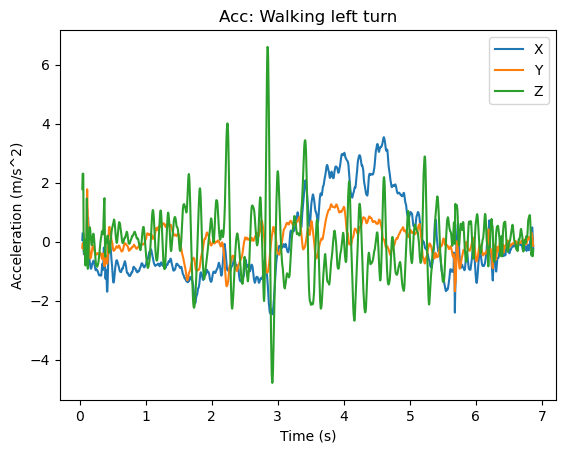

In [2]:
# Remove DC offset
acc_x = acc['Acceleration x (m/s^2)'] - np.mean(acc['Acceleration x (m/s^2)'])
acc_y = acc['Acceleration y (m/s^2)'] - np.mean(acc['Acceleration y (m/s^2)'])
acc_z = acc['Acceleration z (m/s^2)'] - np.mean(acc['Acceleration z (m/s^2)'])

plt.plot(acc['Time (s)'], acc_x, label='X')
plt.plot(acc['Time (s)'], acc_y, label='Y')
plt.plot(acc['Time (s)'], acc_z, label='Z')

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acc: Walking left turn')
print('It seems that X mostly plays a role in taking a left turn.')

plt.legend()
plt.show()


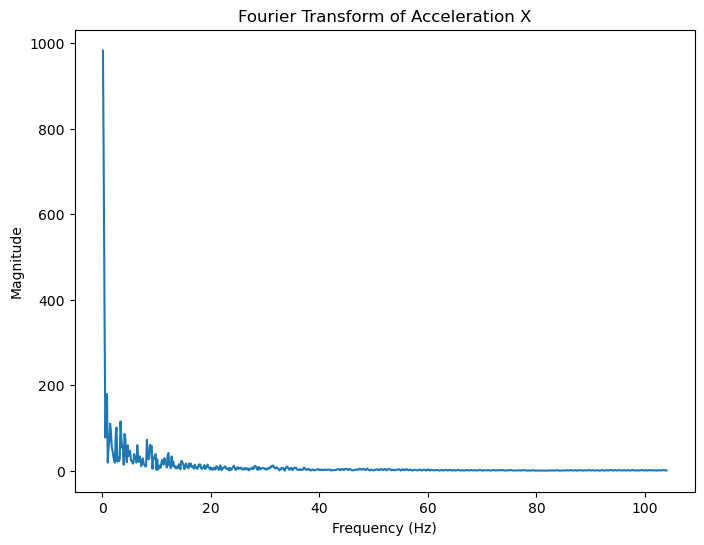

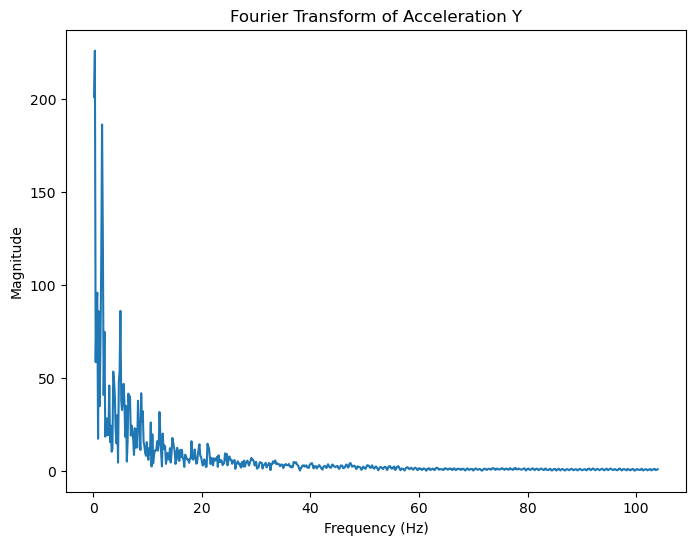

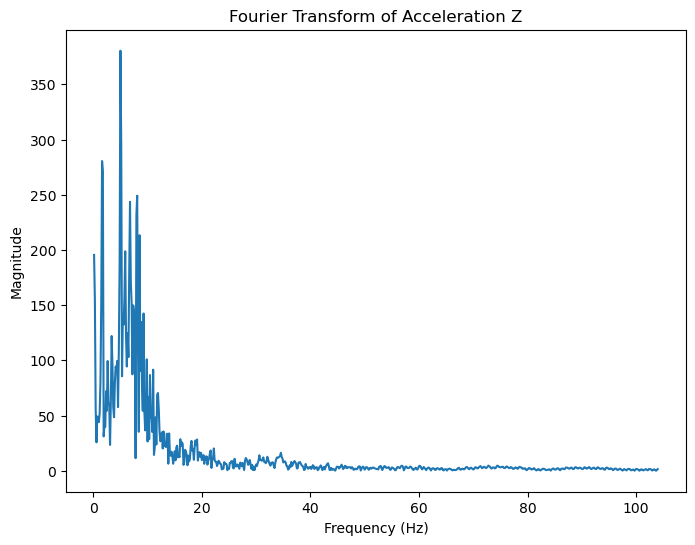

In [3]:
# Remove DC offset
acc_x = acc['Acceleration x (m/s^2)'] - np.mean(acc['Acceleration x (m/s^2)'])
acc_y = acc['Acceleration y (m/s^2)'] - np.mean(acc['Acceleration y (m/s^2)'])
acc_z = acc['Acceleration z (m/s^2)'] - np.mean(acc['Acceleration z (m/s^2)'])

# Compute the time step and create the time axis
dt = 1 / acc_fs
t = np.arange(0, len(acc)) * dt

# Compute the Fourier transform of each dimension's data
freq_x = np.fft.fft(acc_x)
freq_y = np.fft.fft(acc_y)
freq_z = np.fft.fft(acc_z)

# Create the frequency axis
freq_axis = np.fft.fftfreq(len(acc), d=dt)
range_nf = freq_axis > 0

# Plot the magnitude of the Fourier transform for each dimension
plt.figure(figsize=(8, 6))
plt.plot(freq_axis[range_nf], np.abs(freq_x)[range_nf])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Acceleration X')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(freq_axis[range_nf], np.abs(freq_y)[range_nf])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Acceleration Y')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(freq_axis[range_nf], np.abs(freq_z)[range_nf])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Acceleration Z')
plt.show()


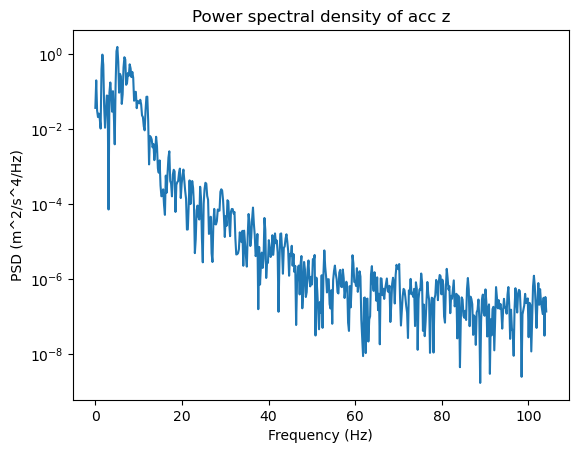

In [4]:
from scipy.signal import welch
from scipy import signal

# Timestep
dt = 1 / acc_fs

# Calculate the Fourier transform of the x dimension
f_x, X = signal.periodogram(acc_x, acc_fs, detrend='linear')

# Calculate the PSD of the x dimension
f_pxx, Pxx = welch(acc_x, acc_fs, nperseg=1024)

# Plot the PSD of the x dimension
plt.semilogy(f_pxx, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (m^2/s^4/Hz)')
plt.title('Power spectral density of acc x')
plt.show()

# Calculate the Fourier transform of the y dimension
f_y, Y = signal.periodogram(acc_y, acc_fs, detrend='linear')

# Calculate the PSD of the y dimension
f_pyy, Pyy = welch(acc_y, acc_fs, nperseg=1024)

# Plot the PSD of the y dimension
plt.semilogy(f_pyy, Pyy)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (m^2/s^4/Hz)')
plt.title('Power spectral density of acc y')
plt.show()

# Calculate the Fourier transform of the z dimension
f_z, Z = signal.periodogram(acc_z, acc_fs, detrend='linear')

# Calculate the PSD of the z dimension
f_pzz, Pzz = welch(acc_z, acc_fs, nperseg=1024)

# Plot the PSD of the z dimension
plt.semilogy(f_pzz, Pzz)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (m^2/s^4/Hz)')
plt.title('Power spectral density of acc z')
plt.show()


Gyroscope and angle (and fix drift)?

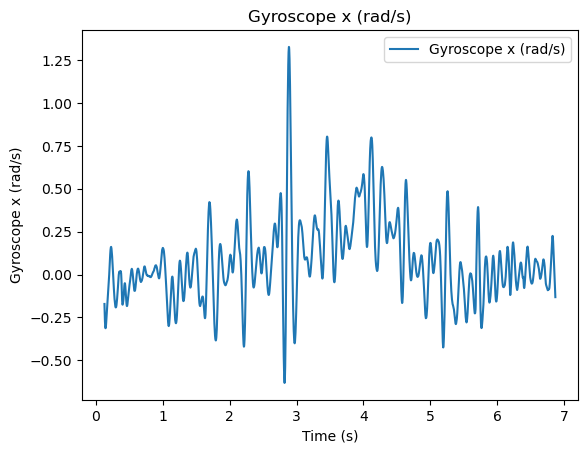

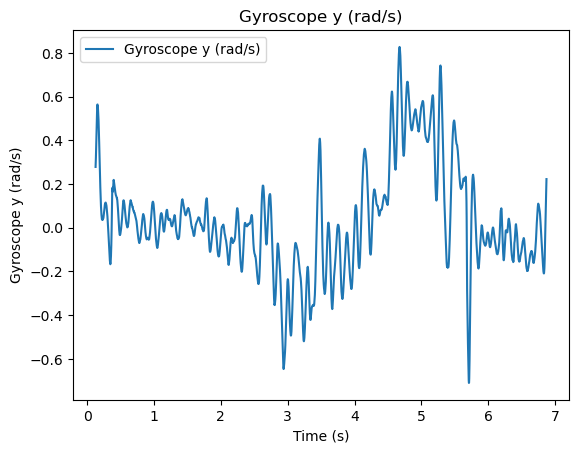

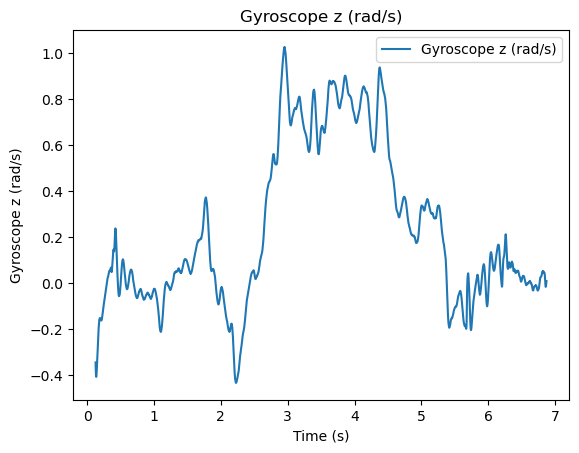

In [5]:
# Remove DC offset
gyr_x = gyr['Gyroscope x (rad/s)']# - np.mean(gyr['Gyroscope x (rad/s)'])
gyr_y = gyr['Gyroscope y (rad/s)']# - np.mean(gyr['Gyroscope y (rad/s)'])
gyr_z = gyr['Gyroscope z (rad/s)']# - np.mean(gyr['Gyroscope z (rad/s)'])

def plot_axis(data_df,col_name,label,title):
    col_data = data_df[col_name]

    plt.plot(data_df['Time (s)'], col_data, label=label)
    plt.xlabel('Time (s)')
    plt.ylabel(col_name)
    plt.title(title)
    plt.legend()
    plt.show()

plot_axis(gyr,'Gyroscope x (rad/s)','Gyroscope x (rad/s)','Gyroscope x (rad/s)')
plot_axis(gyr,'Gyroscope y (rad/s)','Gyroscope y (rad/s)','Gyroscope y (rad/s)')
plot_axis(gyr,'Gyroscope z (rad/s)','Gyroscope z (rad/s)','Gyroscope z (rad/s)')

print('')

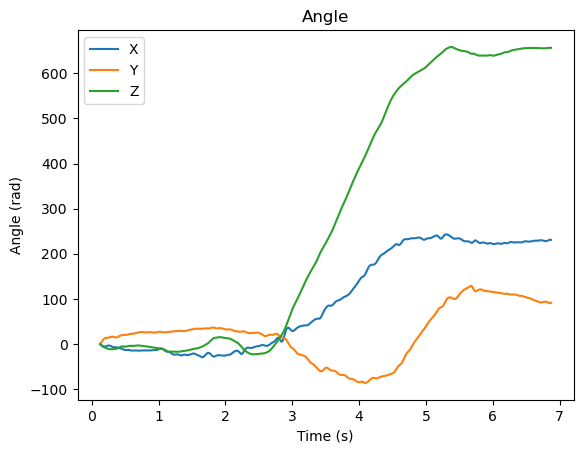

In [6]:
# Compute the cumulative sum of the gyroscope data for each dimension to get the angle
angle_x = np.cumsum(gyr['Gyroscope x (rad/s)'])
angle_y = np.cumsum(gyr['Gyroscope y (rad/s)'])
angle_z = np.cumsum(gyr['Gyroscope z (rad/s)'])

# Plot the angle for each dimension
plt.plot(gyr['Time (s)'], angle_x, label='X')
plt.plot(gyr['Time (s)'], angle_y, label='Y')
plt.plot(gyr['Time (s)'], angle_z, label='Z')

# Add axis labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle')
plt.legend()
plt.show()